# Chap06 비전 에이전트

In [ ]:
!pip install PyQt5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 KB 26.1 MB/s eta 0:00:00


In [ ]:
!pip install winsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement winsound (from versions: none)
ERROR: No matching distribution found for winsound


In [ ]:
## import winsound # 설치 필요 없다는데 ? https://hleecaster.com/python-play-sound/

## https://www.inflearn.com/questions/25408/%EB%A7%A5%EC%97%90%EC%84%9C-winsound-%EB%AA%A8%EB%93%88%EC%9D%84-%EC%B0%BE%EC%9D%84-%EC%88%98-%EC%97%86%EB%8B%A4%EB%8A%94-%EC%97%90%EB%9F%AC%EA%B0%80-%EB%9C%B9%EB%8B%88%EB%8B%A4
import pygame

pygame 2.3.0 (SDL 2.24.2, Python 3.9.16)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
from PyQt5.QtWidgets import *
import sys
import winsound # 삑 소리를 내는 데 사용

# PyQt로 GUI 제작하는 일을 지원하는 클래스 선언
class BeepSound(QMainWindow): # QMainWindow(윈도우 생성하고 관리하는 함수 제공하는 class) 상속
    # 객체 생성하면 자동으로 실행되는 생성자 함수 정의
    def __init__(self) :
        super().__init__()
        self.setWindowTitle('삑 소리 내기') 		# 윈도우 이름과 위치 지정
        self.setGeometry(200,200,500,100) # 윈도우를 화면의 해당크기로 해당위치에 지정
        
        # 위젯 사용
        shortBeepButton=QPushButton('짧게 삑',self)	# 버튼 생성
        longBeepButton=QPushButton('길게 삑',self)
        quitButton=QPushButton('나가기',self)
        self.label=QLabel('환영합니다!',self) # 레이블 객체에 저장
        
        # 버튼 위치와 크기 지정
        shortBeepButton.setGeometry(10,10,100,30)	
        longBeepButton.setGeometry(110,10,100,30)
        quitButton.setGeometry(210,10,100,30)
        self.label.setGeometry(10,40,500,70)
        
        # 콜백 함수 지정 : 사용자가 버튼 클릭 시, 수행
        shortBeepButton.clicked.connect(self.shortBeepFunction)
        longBeepButton.clicked.connect(self.longBeepFunction)         
        quitButton.clicked.connect(self.quitFunction)
       
    def shortBeepFunction(self):
        self.label.setText('주파수 1000으로 0.5초 동안 삑 소리를 냅니다.') # 레이블 위젯에 지정한 텍스트 작성
        winsound.Beep(1000,500) # 주파수 1000인 삑 소리 500ms(0.5초)동안 들려줌
        
    def longBeepFunction(self):
        self.label.setText('주파수 1000으로 3초 동안 삑 소리를 냅니다.')        
        winsound.Beep(1000,3000) 
                
    def quitFunction(self):
        self.close()
                
app=QApplication(sys.argv) # PyGt 실행에 필요한 객체 app 생성
win=BeepSound() # BeepSound 클래스의 객체 win 생성
win.show()
app.exec_()


In [ ]:
# 6-2 OpenCV에서 PyQt의 GUI 붙이기-비디오에서 프레임을 잡아 저장하기
from PyQt5.QtWidgets import *
import sys
import cv2 as cv
       
class Video(QMainWindow):
    def __init__(self) :
        super().__init__()
        self.setWindowTitle('비디오에서 프레임 수집')	# 윈도우 이름
        self.setGeometry(200,200,500,100) # 나타날 윈도우의 크기와 위치 지정

        # 버튼 생성
        videoButton=QPushButton('비디오 켜기',self)
        captureButton=QPushButton('프레임 잡기',self)
        saveButton=QPushButton('프레임 저장',self)
        quitButton=QPushButton('나가기',self)
        
        # 버튼 위치와 크기 지정
        videoButton.setGeometry(10,10,100,30)		
        captureButton.setGeometry(110,10,100,30)
        saveButton.setGeometry(210,10,100,30)
        quitButton.setGeometry(310,10,100,30)
        
        # 콜백 함수 지정
        videoButton.clicked.connect(self.videoFunction) # 비디오켜기 버튼을 누르지마자 videoFunction 호출
        captureButton.clicked.connect(self.captureFunction)         
        saveButton.clicked.connect(self.saveFunction)
        quitButton.clicked.connect(self.quitFunction)

    # OpenCV 함수를 이용해 웹캠으로부터 비디오 입력받아 윈도우에 디스플레이   
    def videoFunction(self):
        self.cap=cv.VideoCapture(0,cv.CAP_DSHOW)	# 카메라와 연결 시도
        ## cap : 나가기 버튼 클릭시 quitFunction 에서 비디오 연결 끊는 것에 사용
        if not self.cap.isOpened(): self.close() # 연결실패 시, 오류메시지 출력 + 비디오 종료료
            
        while True:
            ret,self.frame=self.cap.read() # 비디오에서 프레임 획득
            ## frame : 프레임 잡기 버튼을 누른 순간 capturedFrame 변수 저장할 때 사용
            if not ret: break            
            cv.imshow('video display',self.frame) # 윈도우에 표시시
            cv.waitKey(1)

    # <프레임 잡기>라는 captureButton의 콜백함수로 등록
    def captureFunction(self):
        self.capturedFrame=self.frame # 프레임 저장
        cv.imshow('Captured Frame',self.capturedFrame)

    # <프레임 저장>이라는 saveButton의 콜백 함수로 등록    
    def saveFunction(self):				# 파일 저장
        fname=QFileDialog.getSaveFileName(self,'파일 저장','./')
        cv.imwrite(fname[0],self.capturedFrame)

    # <나가기>이라는 quitFunction의 콜백 함수로 등록    
    def quitFunction(self):
        self.cap.release()				# 카메라와 연결을 끊음
        cv.destroyAllWindows()
        self.close()
                
app=QApplication(sys.argv) 
win=Video() 
win.show()
app.exec_()

In [ ]:
# 6-3 GrabCut을 이용해 관심 물체 오리기
import cv2 as cv 
import numpy as np
import sys
from PyQt5.QtWidgets import *
      
class Orim(QMainWindow):
    def __init__(self) :
        super().__init__()
        self.setWindowTitle('오림')
        self.setGeometry(200,200,700,200) # 윈도우 위치와 크기 설정
       
       # GUI 윈도우 버튼 7개 생성
        fileButton=QPushButton('파일',self) # 원하는 영상 선택
        paintButton=QPushButton('페인팅',self) # 물체 영역과 배경 영역을 칠하는 기능
        cutButton=QPushButton('오림',self) # 물체 영역 오리는 기능
        incButton=QPushButton('+',self) # 붓의 크기 조정
        decButton=QPushButton('-',self) # 붓의 크기 조정
        saveButton=QPushButton('저장',self) # 오려낸 물체 영상 저장
        quitButton=QPushButton('나가기',self) # 프로그램 종료하는 기능 제공
        
        # 버튼을 위해 콜백함수 등록
        fileButton.setGeometry(10,10,100,30) # 파일 콜백
        paintButton.setGeometry(110,10,100,30)
        cutButton.setGeometry(210,10,100,30)
        incButton.setGeometry(310,10,50,30)
        decButton.setGeometry(360,10,50,30)
        saveButton.setGeometry(410,10,100,30)
        quitButton.setGeometry(510,10,100,30)
        
        fileButton.clicked.connect(self.fileOpenFunction)
        paintButton.clicked.connect(self.paintFunction) 
        cutButton.clicked.connect(self.cutFunction)    
        incButton.clicked.connect(self.incFunction)              
        decButton.clicked.connect(self.decFunction) 
        saveButton.clicked.connect(self.saveFunction)                         
        quitButton.clicked.connect(self.quitFunction)

        self.BrushSiz=5			# 페인팅 붓의 크기
        self.LColor,self.RColor=(255,0,0),(0,0,255) # 파란색 물체, 빨간색 배경

    # 7개 버튼을 위한 콜백함수    
    def fileOpenFunction(self):
        fname=QFileDialog.getOpenFileName(self,'Open file','./') # 폴더 브라우징-파일저장장
        self.img=cv.imread(fname[0])
        if self.img is None: sys.exit('파일을 찾을 수 없습니다.')  
        
        self.img_show=np.copy(self.img)	# 원본영상이 필요해 복사본인 표시용 영상 
        cv.imshow('Painting',self.img_show)
        
        self.mask=np.zeros((self.img.shape[0],self.img.shape[1]),np.uint8) # 사용자가 색칠한 정보를 저장할 mask 객체 생성
        self.mask[:,:]=cv.GC_PR_BGD	# 모든 화소를 배경일 것 같음으로 초기화

    # 페인팅이라는 콜백함수 등록        
    def paintFunction(self):
        cv.setMouseCallback('Painting',self.painting) 
        
    def painting(self,event,x,y,flags,param):
        if event==cv.EVENT_LBUTTONDOWN:   
            cv.circle(self.img_show,(x,y),self.BrushSiz,self.LColor,-1) # 왼쪽 버튼을 클릭하면 파란색
            cv.circle(self.mask,(x,y),self.BrushSiz,cv.GC_FGD,-1)
        elif event==cv.EVENT_RBUTTONDOWN: 
            cv.circle(self.img_show,(x,y),self.BrushSiz,self.RColor,-1) # 오른쪽 버튼을 클릭하면 빨간색
            cv.circle(self.mask,(x,y),self.BrushSiz,cv.GC_BGD,-1)
        elif event==cv.EVENT_MOUSEMOVE and flags==cv.EVENT_FLAG_LBUTTON:
            cv.circle(self.img_show,(x,y),self.BrushSiz,self.LColor,-1) # 왼쪽 버튼을 클릭하고 이동하면 파란색
            cv.circle(self.mask,(x,y),self.BrushSiz,cv.GC_FGD,-1)
        elif event==cv.EVENT_MOUSEMOVE and flags==cv.EVENT_FLAG_RBUTTON:
            cv.circle(self.img_show,(x,y),self.BrushSiz,self.RColor,-1) # 오른쪽 버튼을 클릭하고 이동하면 빨간색 
            cv.circle(self.mask,(x,y),self.BrushSiz,cv.GC_BGD,-1)
    
        cv.imshow('Painting',self.img_show)        

    # 오림이라는 콜백함수로 등록    
    def cutFunction(self):
        background=np.zeros((1,65),np.float64) 
        foreground=np.zeros((1,65),np.float64) 
        cv.grabCut(self.img,self.mask,None,background,foreground,5,cv.GC_INIT_WITH_MASK)
        mask2=np.where((self.mask==2)|(self.mask==0),0,1).astype('uint8')
        self.grabImg=self.img*mask2[:,:,np.newaxis]
        cv.imshow('Scissoring',self.grabImg) 
        
    def incFunction(self):
        self.BrushSiz=min(20,self.BrushSiz+1) 
        
    def decFunction(self):
        self.BrushSiz=max(1,self.BrushSiz-1) 
        
    def saveFunction(self):
        fname=QFileDialog.getSaveFileName(self,'파일 저장','./')
        cv.imwrite(fname[0],self.grabImg)
                
    def quitFunction(self):
        cv.destroyAllWindows()        
        self.close()
                
app=QApplication(sys.argv) 
win=Orim() 
win.show()
app.exec_()

In [ ]:
# 6-4. 교통약자 보호구역 알림 구현
import cv2 as cv
import numpy as np
from PyQt5.QtWidgets import *
import sys
import winsound

class TrafficWeak(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setWindowTitle('교통약자 보호')
        self.setGeometry(200,200,700,200)
       
       # 버튼과 레이블 생성
        signButton=QPushButton('표지판 등록',self) # 세 종류의 표지판 모델 영상 읽어 등록
        roadButton=QPushButton('도로 영상 불러옴',self) # 사용자가 도로 영상을 선택
        recognitionButton=QPushButton('인식',self) # 표지판 영상을 인식하고 결과 show
        quitButton=QPushButton('나가기',self)
        self.label=QLabel('환영합니다!',self)
        
       # 버튼과 레이블 위치 지정 
        signButton.setGeometry(10,10,100,30)
        roadButton.setGeometry(110,10,100,30)
        recognitionButton.setGeometry(210,10,100,30)
        quitButton.setGeometry(510,10,100,30)
        self.label.setGeometry(10,40,600,170)
        
       # 사용자가 버튼 클릭 시, 수행할 콜백함수 지정
        signButton.clicked.connect(self.signFunction)
        roadButton.clicked.connect(self.roadFunction) 
        recognitionButton.clicked.connect(self.recognitionFunction)        
        quitButton.clicked.connect(self.quitFunction)

        self.signFiles=[['child.png','어린이'],['elder.png','노인'],['disabled.png','장애인']]	# 표지판 모델 png 영상을 저장
        self.signImgs=[]				# 표지판 모델 영상 저장

# 버튼 4개에 해당하는 콜백함수    

    def signFunction(self):
        self.label.clear() # 레이블 제거
        self.label.setText('교통약자 번호판을 등록합니다.') # 메세지 출력
        
        for fname,_ in self.signFiles: # 요소 각각에 대한 파일 이름을 담음
            self.signImgs.append(cv.imread(fname)) # 이미지 읽기 
            cv.imshow(fname,self.signImgs[-1]) # display

    def roadFunction(self):
        if self.signImgs==[]: 
            self.label.setText('먼저 번호판을 등록하세요.')
        else:
            fname=QFileDialog.getOpenFileName(self,'파일 읽기','./') # 폴더 브라우징 하며 도로 영상 선택
            self.roadImg=cv.imread(fname[0]) # 영상 파일 읽기 
            if self.roadImg is None: sys.exit('파일을 찾을 수 없습니다.')  
    
            cv.imshow('Road scene',self.roadImg)  
        
    def recognitionFunction(self):
        if self.roadImg is None: 
            self.label.setText('먼저 도로 영상을 입력하세요.')
        else:
          # SIFT로 호모그래피 찾아 표시 
            sift=cv.SIFT_create()
        
            KD=[] # 여러 표지판 영상의 키포인트와 기술자 저장
            for img in self.signImgs: 
                gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
                KD.append(sift.detectAndCompute(gray,None))
                
            grayRoad=cv.cvtColor(self.roadImg,cv.COLOR_BGR2GRAY) # 명암으로 변환
            road_kp,road_des=sift.detectAndCompute(grayRoad,None) # 키포인트와 기술자 추출하면 자료 구조 생성 
                
            matcher=cv.DescriptorMatcher_create(cv.DescriptorMatcher_FLANNBASED) # FLANN 기반 매칭해주는 match 객체 생성
            GM=[]			# 여러 표지판 영상의 good match를 저장
            for sign_kp,sign_des in KD: # 특징점과 기술자 꺼내내
                knn_match=matcher.knnMatch(sign_des,road_des,2) # 특징점마다 최근접 이웃 2개 찾기
                T=0.7
                good_match=[] # 좋은 매칭 골라 저장
                for nearest1,nearest2 in knn_match:
                    if (nearest1.distance/nearest2.distance)<T:
                        good_match.append(nearest1)
                GM.append(good_match)        
            
            best=GM.index(max(GM,key=len)) # 매칭 쌍 개수가 최대인 번호판 찾기
            
            if len(GM[best])<4:	# 최선의 번호판이 매칭 쌍 4개 미만이면 실패
                self.label.setText('표지판이 없습니다.')  
            else:			# 성공(호모그래피 찾아 영상에 표시)
                sign_kp=KD[best][0]
                good_match=GM[best]
            
              # 특징점과 매칭 정보 그리기
                points1=np.float32([sign_kp[gm.queryIdx].pt for gm in good_match])
                points2=np.float32([road_kp[gm.trainIdx].pt for gm in good_match])
                
                H,_=cv.findHomography(points1,points2,cv.RANSAC)
                
                h1,w1=self.signImgs[best].shape[0],self.signImgs[best].shape[1] # 번호판 영상의 크기
                h2,w2=self.roadImg.shape[0],self.roadImg.shape[1] # 도로 영상의 크기
                
                box1=np.float32([[0,0],[0,h1-1],[w1-1,h1-1],[w1-1,0]]).reshape(4,1,2)
                box2=cv.perspectiveTransform(box1,H)
                
                self.roadImg=cv.polylines(self.roadImg,[np.int32(box2)],True,(0,255,0),4)
                
                img_match=np.empty((max(h1,h2),w1+w2,3),dtype=np.uint8)
                cv.drawMatches(self.signImgs[best],sign_kp,self.roadImg,road_kp,good_match,img_match,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
                cv.imshow('Matches and Homography',img_match)
                
                # best = 0 어린이, best = 1 노인, 2 장애인

                self.label.setText(self.signFiles[best][1]+' 보호구역입니다. 30km로 서행하세요.')                 
                winsound.Beep(3000,500)       # 소리내서 주의 기울임  
                      
    def quitFunction(self):
        cv.destroyAllWindows()        
        self.close()
                
app=QApplication(sys.argv) 
win=TrafficWeak() 
win.show()
app.exec_()

In [ ]:
# 6.5 비디오에서 수집한 영상을 봉함해 파노라마 영상 제작
from PyQt5.QtWidgets import *
import cv2 as cv
import numpy as np
import winsound
import sys
   
class Panorama(QMainWindow) :
    def __init__(self) :
        super().__init__()
        self.setWindowTitle('파노라마 영상')
        self.setGeometry(200,200,700,200)
        
        collectButton=QPushButton('영상 수집',self)
        self.showButton=QPushButton('영상 보기',self) 
        self.stitchButton=QPushButton('봉합',self) 
        self.saveButton=QPushButton('저장',self)
        quitButton=QPushButton('나가기',self)
        self.label=QLabel('환영합니다!',self)
        
        collectButton.setGeometry(10,25,100,30)
        self.showButton.setGeometry(110,25,100,30) 
        self.stitchButton.setGeometry(210,25,100,30) 
        self.saveButton.setGeometry(310,25,100,30)
        quitButton.setGeometry(450,25,100,30) 
        self.label.setGeometry(10,70,600,170)

        # 버튼을 비활성으로 설정해 클릭할 수 없게 함
        self.showButton.setEnabled(False) 
        self.stitchButton.setEnabled(False) 
        self.saveButton.setEnabled(False)
        
        # 버튼 클릭시 수행할 콜백함수 등록
        collectButton.clicked.connect(self.collectFunction)
        self.showButton.clicked.connect(self.showFunction)       
        self.stitchButton.clicked.connect(self.stitchFunction) 
        self.saveButton.clicked.connect(self.saveFunction)   
        quitButton.clicked.connect(self.quitFunction)        

 
    def collectFunction(self):
       # 버튼을 비활성으로 설정해 클릭할 수 없게 함 -> 사용자가 다시 시도하는 경우 대비
        self.showButton.setEnabled(False) 
        self.stitchButton.setEnabled(False) 
        self.saveButton.setEnabled(False)
        self.label.setText('c를 여러 번 눌러 수집하고 끝나면 q를 눌러 비디오를 끕니다.')
        
        self.cap=cv.VideoCapture(0,cv.CAP_DSHOW) 
        if not self.cap.isOpened(): sys.exit('카메라 연결 실패')
        
        self.imgs=[]   
        while True:
            ret,frame=self.cap.read()  
            if not ret: break
            
            cv.imshow('video display', frame)
            
            key=cv.waitKey(1) 
            # c를 누를 때마다 그때의 영상 imgs에 추가
            if key==ord('c'):            
                self.imgs.append(frame)	# 영상 저장

            # q를 누를 때마다 비디오 연결 끊고 웹 캠과 연결된 윈도우 닫고 루프 out 
            elif key==ord('q'):
                self.cap.release() 
                cv.destroyWindow('video display')                
                break 
        
        if len(self.imgs)>=2:		# 수집한 영상이 2장 이상이면
            self.showButton.setEnabled(True) 
            self.stitchButton.setEnabled(True) 
            self.saveButton.setEnabled(True)  # 버튼 활성화 해 이후 작업 가능하도록 함

    # 영상 보기               
    def showFunction(self):
        self.label.setText('수집된 영상은 '+str(len(self.imgs))+'장 입니다.')
        stack=cv.resize(self.imgs[0],dsize=(0,0),fx=0.25,fy=0.25) # 0.25배 축소
        for i in range(1,len(self.imgs)):
            stack=np.hstack((stack,cv.resize(self.imgs[i],dsize=(0,0),fx=0.25,fy=0.25))) # hstack 으로 이어 붙임 
        cv.imshow('Image collection',stack)        
        
    def stitchFunction(self):
        stitcher=cv.Stitcher_create()
        status,self.img_stitched=stitcher.stitch(self.imgs) # 봉합 시도
        if status==cv.STITCHER_OK:
            cv.imshow('Image stitched panorama',self.img_stitched)   # 봉합 성공   
        else:
            winsound.Beep(3000,500)            
            self.label.setText('파노라마 제작에 실패했습니다. 다시 시도하세요.')   # 봉합 실패 
            
    def saveFunction(self):
        fname=QFileDialog.getSaveFileName(self,'파일 저장','./')
        cv.imwrite(fname[0],self.img_stitched)
        
    def quitFunction(self): 
        self.cap.release() 
        cv.destroyAllWindows()  
        self.close()

app=QApplication(sys.argv) 
win=Panorama() 
win.show()
app.exec_()

In [ ]:
# 6-6 사진 영상에 특수 효과 처리하기
import cv2 as cv
import numpy as np
from PyQt5.QtWidgets import *
import sys    
    
class SpecialEffect(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setWindowTitle('사진 특수 효과')
        self.setGeometry(200,200,800,200)
       
        pictureButton=QPushButton('사진 읽기',self)
        embossButton=QPushButton('엠보싱',self)
        cartoonButton=QPushButton('카툰',self)
        sketchButton=QPushButton('연필 스케치',self)
        oilButton=QPushButton('유화',self)
        saveButton=QPushButton('저장하기',self) 
        self.pickCombo=QComboBox(self)     # 콤보박스스
        self.pickCombo.addItems(['엠보싱','카툰','연필 스케치(명암)','연필 스케치(컬러)','유화']) # 콤보박스에 대해 5개 선택서헝 자종
        quitButton=QPushButton('나가기',self)        
        self.label=QLabel('환영합니다!',self)
        
        pictureButton.setGeometry(10,10,100,30)
        embossButton.setGeometry(110,10,100,30)
        cartoonButton.setGeometry(210,10,100,30)
        sketchButton.setGeometry(310,10,100,30)
        oilButton.setGeometry(410,10,100,30)  
        saveButton.setGeometry(510,10,100,30)
        self.pickCombo.setGeometry(510,40,110,30)                  
        quitButton.setGeometry(620,10,100,30)
        self.label.setGeometry(10,40,500,170)
        
        pictureButton.clicked.connect(self.pictureOpenFunction)
        embossButton.clicked.connect(self.embossFunction) 
        cartoonButton.clicked.connect(self.cartoonFunction)
        sketchButton.clicked.connect(self.sketchFunction)
        oilButton.clicked.connect(self.oilFunction) 
        saveButton.clicked.connect(self.saveFunction)    
        quitButton.clicked.connect(self.quitFunction)

    # 사진 읽기 버튼 클릭릭
    def pictureOpenFunction(self):
        fname=QFileDialog.getOpenFileName(self,'사진 읽기','./') # 파일 브라우징해 선택
        self.img=cv.imread(fname[0])    
        if self.img is None: sys.exit('파일을 찾을 수 없습니다.')  
        
        cv.imshow('Painting',self.img)   # 윈도우 디스플레이      

    def embossFunction(self):
        femboss=np.array([[-1.0, 0.0, 0.0],[0.0, 0.0, 0.0],[0.0, 0.0, 1.0]])
        
        # 명암영상 변환 후 컨볼루션션
        gray=cv.cvtColor(self.img,cv.COLOR_BGR2GRAY) 
        gray16=np.int16(gray) # 16비트 정수로 변환환
        self.emboss=np.uint8(np.clip(cv.filter2D(gray16,-1,femboss)+128,0,255))
        
        cv.imshow('Emboss',self.emboss)
    
    def cartoonFunction(self): # stylization
        self.cartoon=cv.stylization(self.img,sigma_s=60,sigma_r=0.45)
        cv.imshow('Cartoon',self.cartoon) 
    
    def sketchFunction(self): # pencilSketch
        self.sketch_gray,self.sketch_color=cv.pencilSketch(self.img,sigma_s=60,sigma_r=0.07,shade_factor=0.02)
        cv.imshow('Pencil sketch(gray)',self.sketch_gray) # 명암 스케치
        cv.imshow('Pencil sketch(color)',self.sketch_color) # 컬러 스케치

    def oilFunction(self): # oilPainting
        self.oil=cv.xphoto.oilPainting(self.img,10,1,cv.COLOR_BGR2Lab)
        cv.imshow('Oil painting',self.oil) 
                           
    def saveFunction(self):      
        fname=QFileDialog.getSaveFileName(self,'파일 저장','./')
        
        i=self.pickCombo.currentIndex()
        if i==0: cv.imwrite(fname[0],self.emboss)
        elif i==1: cv.imwrite(fname[0],self.cartoon)
        elif i==2: cv.imwrite(fname[0],self.sketch_gray)
        elif i==3: cv.imwrite(fname[0],self.sketch_color)
        elif i==4: cv.imwrite(fname[0],self.oil)
                        
    def quitFunction(self):
        cv.destroyAllWindows()        
        self.close()
                
app=QApplication(sys.argv) 
win=SpecialEffect() 
win.show()
app.exec_()

In [ ]:
# 6-7 비디오에 특수효과 처리하기

import cv2 as cv
import numpy as np
from PyQt5.QtWidgets import *
import sys
    
class VideoSpecialEffect(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setWindowTitle('비디오 특수 효과')
        self.setGeometry(200,200,400,100)
       
        videoButton=QPushButton('비디오 시작',self)
        self.pickCombo=QComboBox(self)   # 콤보 박스
        self.pickCombo.addItems(['엠보싱','카툰','연필 스케치(명암)','연필 스케치(컬러)','유화'])
        quitButton=QPushButton('나가기',self)        
        
        videoButton.setGeometry(10,10,140,30)
        self.pickCombo.setGeometry(150,10,110,30)                  
        quitButton.setGeometry(280,10,100,30)
        
        videoButton.clicked.connect(self.videoSpecialEffectFunction) 
        quitButton.clicked.connect(self.quitFunction)
        
    def videoSpecialEffectFunction(self):             
        self.cap=cv.VideoCapture(0,cv.CAP_DSHOW) # 웹캠 연결시도
        if not self.cap.isOpened(): sys.exit('카메라 연결 실패')
        
        # 실시간으로 비디오 프레임 읽고 지정된 특수 효과 적용
        while True:
            ret,frame=self.cap.read()  # 프레임 읽기
            if not ret: break

            pick_effect=self.pickCombo.currentIndex()  # 콤보박스에서서 사용자가 선택한 특수효과의 번호를 알아냄
            if pick_effect==0: # 엠보싱
                femboss=np.array([[-1.0, 0.0, 0.0],[0.0, 0.0, 0.0],[0.0, 0.0, 1.0]])
                gray=cv.cvtColor(frame,cv.COLOR_BGR2GRAY)    
                gray16=np.int16(gray)
                special_img=np.uint8(np.clip(cv.filter2D(gray16,-1,femboss)+128,0,255))
            elif pick_effect==1: # 카툰
                special_img=cv.stylization(frame,sigma_s=60,sigma_r=0.45)
            elif pick_effect==2: # 연필스케치명암
                special_img,_=cv.pencilSketch(frame,sigma_s=60,sigma_r=0.07,shade_factor=0.02)
            elif pick_effect==3: # 연필스케치컬러
                _,special_img=cv.pencilSketch(frame,sigma_s=60,sigma_r=0.07,shade_factor=0.02)
            elif pick_effect==4: # 유화효과
                special_img=cv.xphoto.oilPainting(frame,10,1,cv.COLOR_BGR2Lab)
                
            cv.imshow('Special effect',special_img)              
            cv.waitKey(1) 
                                        
    def quitFunction(self):
        self.cap.release()
        cv.destroyAllWindows()        
        self.close()
                
app=QApplication(sys.argv) 
win=VideoSpecialEffect() 
win.show()
app.exec_()

# Chap07 딥러닝 비전

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
170498071/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


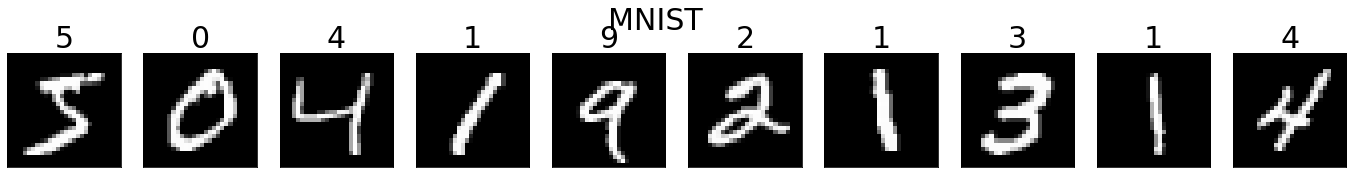

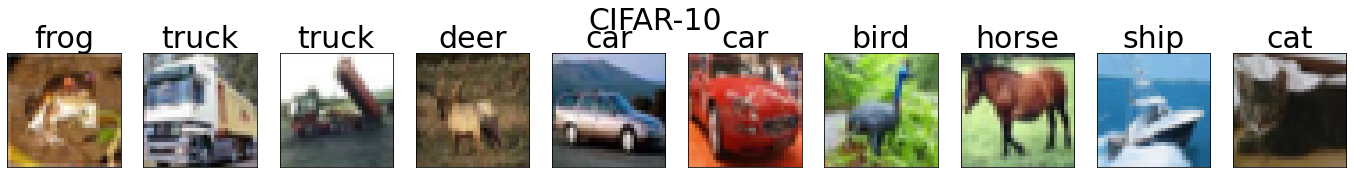

In [ ]:
# 7-1
import tensorflow as tf # tensorflow 모듈 불러옴
import tensorflow.keras.datasets as ds # 데이터셋 읽어오는데 필요한 모듈 불러옴
import matplotlib.pyplot as plt

# mnist 데이터셋 읽고 모양 확인, 몇개 샘플 출력해 내용 확인
(x_train,y_train),(x_test,y_test)=ds.mnist.load_data() # mnist 데이터셋 읽어 train, test에 저장
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape) # 구조 출력 : 3차원, 1차원
plt.figure(figsize=(24,3))
plt.suptitle('MNIST',fontsize=30)
for i in range(10): # 앞에 배치되어 있는 10개 샘플 보임
    plt.subplot(1,10,i+1) # 1줄에 10개 영상 배치, i+1번째 채우기
    plt.imshow(x_train[i],cmap='gray') # i번째 샘플을 명암으로 출력
    plt.xticks([]); plt.yticks([]) # 눈금 X
    plt.title(str(y_train[i]),fontsize=30) # 제목 : 샘플의 부류 정보

# CIFAR-10 데이터셋 읽고 모양 확인, 몇개 샘플 출력해 내용 확인
(x_train,y_train),(x_test,y_test)=ds.cifar10.load_data() # CIFAR-10 데이터셋 읽어 train, test에 저장
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape) # 구조 출력 :4차원, 1차원
class_names=['airplane','car','bird','cat','deer','dog','frog','horse','ship','truck'] # 0~9 사이의 숫자로 표현된 부류 정보를 물체 이름으로 변환해주는 표
plt.figure(figsize=(24,3))
plt.suptitle('CIFAR-10',fontsize=30)
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i])
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[y_train[i,0]],fontsize=30) # 샘플 위에 물체 부류 정보 표시

In [ ]:
#7.2 다층 퍼셉트론으로 MNIST 인식하기(SGD 옵티마이저)
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

# models, layers, optimizers 모듈에서 필요한 클래스 소환
from tensorflow.keras.models import Sequential # 왼쪽에서 오른쪽으로 계산이 한 줄기로 흐르는 경우 사용
from tensorflow.keras.layers import Dense # 완전연결층
from tensorflow.keras.optimizers import SGD # 옵티마이저 함에서 SGD

# 데이터 준비 - 수집단계계
(x_train,y_train),(x_test,y_test)=ds.mnist.load_data() # 데이터 로드해 훈련, 테스트
x_train=x_train.reshape(60000,784) # 1차원 맵으로 변경 
x_test=x_test.reshape(10000,784) # 1차원 맵으로 변경
x_train=x_train.astype(np.float32)/255.0 # 실수 연산이 가능하도록 데이터 타입 변환
x_test=x_test.astype(np.float32)/255.0 # 실수 연산이 가능하도록 데이터 타입 변환
y_train=tf.keras.utils.to_categorical(y_train,10) # 데이터 출력 결과 onehot코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10) # 데이터 출력 결과 onehot코드로 변환

# 모델선택(신경망 구조 설계) : 다층퍼셉트론 구축
mlp=Sequential() # mlp 객체 생성
## add로 층을 쌓고 dense는 완전연결층
mlp.add(Dense(units=512,activation='tanh',input_shape=(784,))) # 입력층, 은닉층
mlp.add(Dense(units=10,activation='softmax')) # 출력층, 텐서플로가 이전 층의 노드개수를 알아 input_shape 생략략

# 학습
mlp.compile(loss='MSE',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])
mlp.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2) # 실제 학습 실행

# 예측 - 성능 측정
res=mlp.evaluate(x_test,y_test,verbose=0) # 성능 측정 - test 집합으로 실행
print('정확률=',res[1]*100) # 정확률*100으로 퍼센트로 출력

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
469/469 - 16s - loss: 0.0900 - accuracy: 0.1820 - val_loss: 0.0870 - val_accuracy: 0.2746 - 16s/epoch - 34ms/step
Epoch 2/50
469/469 - 7s - loss: 0.0840 - accuracy: 0.3421 - val_loss: 0.0803 - val_accuracy: 0.4110 - 7s/epoch - 15ms/step
Epoch 3/50
469/469 - 5s - loss: 0.0770 - accuracy: 0.4463 - val_loss: 0.0729 - val_accuracy: 0.4828 - 5s/epoch - 11ms/step
Epoch 4/50
469/469 - 4s - loss: 0.0700 - accuracy: 0.5245 - val_loss: 0.0661 - val_accuracy: 0.5710 - 4s/epoch - 9ms/step
Epoch 5/50
469/469 - 4s - loss: 0.0635 - accuracy: 0.6041 - val_loss: 0.0598 - val_accuracy: 0.6499 - 4s/epoch - 9ms/step
Epoch 6/50
469/469 - 5s - loss: 0.0575 - accuracy: 0.6754 - val_loss: 0.0539 - val_accuracy: 0.7112 - 5s/epoch - 11ms/step
Epoch 7/50
469/469 - 4s - loss: 0.0521 - accuracy: 0.7200 - val_loss: 0.0489 - val_accuracy: 0.7391 - 4s/epoch - 9ms/step
Epoch 8/50
469/469 - 5s - loss: 0.0477 - accuracy: 0.7411 - val_loss: 0.044

In [ ]:
# 다층퍼셉트론으로 MNIST 인식하기 (ADAM 옵티마이저)

import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.optimizers import Adam # 앞서 SGD에서 ADAM으로 변경

(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

mlp=Sequential()
mlp.add(Dense(units=512,activation='tanh',input_shape=(784,)))
mlp.add(Dense(units=10,activation='softmax'))

mlp.compile(loss='MSE',optimizer=Adam(learning_rate=0.001),metrics=['accuracy']) # 학습률learning_rate값은 디폴트
mlp.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)

res=mlp.evaluate(x_test,y_test,verbose=0)
print('정확률=',res[1]*100)

Epoch 1/50
469/469 - 7s - loss: 0.0149 - accuracy: 0.9014 - val_loss: 0.0106 - val_accuracy: 0.9311 - 7s/epoch - 14ms/step
Epoch 2/50
469/469 - 6s - loss: 0.0090 - accuracy: 0.9420 - val_loss: 0.0076 - val_accuracy: 0.9503 - 6s/epoch - 12ms/step
Epoch 3/50
469/469 - 5s - loss: 0.0066 - accuracy: 0.9576 - val_loss: 0.0062 - val_accuracy: 0.9598 - 5s/epoch - 11ms/step
Epoch 4/50
469/469 - 6s - loss: 0.0051 - accuracy: 0.9678 - val_loss: 0.0052 - val_accuracy: 0.9680 - 6s/epoch - 13ms/step
Epoch 5/50
469/469 - 5s - loss: 0.0041 - accuracy: 0.9747 - val_loss: 0.0046 - val_accuracy: 0.9715 - 5s/epoch - 11ms/step
Epoch 6/50
469/469 - 6s - loss: 0.0034 - accuracy: 0.9801 - val_loss: 0.0042 - val_accuracy: 0.9720 - 6s/epoch - 13ms/step
Epoch 7/50
469/469 - 5s - loss: 0.0028 - accuracy: 0.9833 - val_loss: 0.0038 - val_accuracy: 0.9760 - 5s/epoch - 10ms/step
Epoch 8/50
469/469 - 5s - loss: 0.0024 - accuracy: 0.9864 - val_loss: 0.0037 - val_accuracy: 0.9760 - 5s/epoch - 11ms/step
Epoch 9/50
469/4

Epoch 1/50
469/469 - 4s - loss: 0.0885 - accuracy: 0.2022 - val_loss: 0.0852 - val_accuracy: 0.2941 - 4s/epoch - 9ms/step
Epoch 2/50
469/469 - 6s - loss: 0.0822 - accuracy: 0.3406 - val_loss: 0.0785 - val_accuracy: 0.4091 - 6s/epoch - 12ms/step
Epoch 3/50
469/469 - 6s - loss: 0.0756 - accuracy: 0.4491 - val_loss: 0.0718 - val_accuracy: 0.5129 - 6s/epoch - 13ms/step
Epoch 4/50
469/469 - 6s - loss: 0.0690 - accuracy: 0.5545 - val_loss: 0.0650 - val_accuracy: 0.6148 - 6s/epoch - 12ms/step
Epoch 5/50
469/469 - 7s - loss: 0.0623 - accuracy: 0.6474 - val_loss: 0.0583 - val_accuracy: 0.6890 - 7s/epoch - 15ms/step
Epoch 6/50
469/469 - 5s - loss: 0.0561 - accuracy: 0.6974 - val_loss: 0.0526 - val_accuracy: 0.7253 - 5s/epoch - 12ms/step
Epoch 7/50
469/469 - 6s - loss: 0.0511 - accuracy: 0.7241 - val_loss: 0.0480 - val_accuracy: 0.7468 - 6s/epoch - 13ms/step
Epoch 8/50
469/469 - 5s - loss: 0.0471 - accuracy: 0.7402 - val_loss: 0.0444 - val_accuracy: 0.7604 - 5s/epoch - 10ms/step
Epoch 9/50
469/46

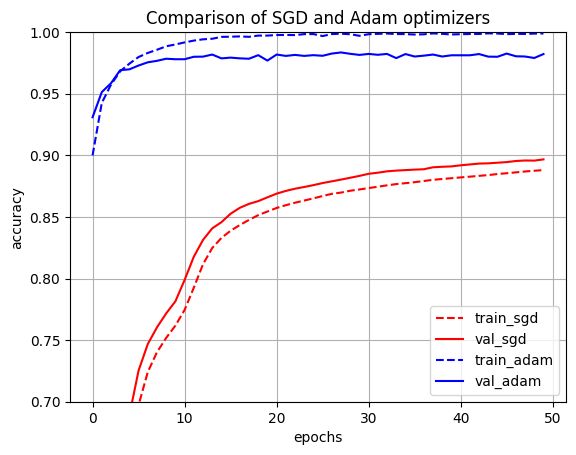

In [ ]:
#7.4 다층 퍼셉트론으로 MNIST 인식하기 - SGD와 ADAM의 성능 그래프 비교
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

mlp_sgd=Sequential()
mlp_sgd.add(Dense(units=512,activation='tanh',input_shape=(784,)))
mlp_sgd.add(Dense(units=10,activation='softmax'))

# SGD
mlp_sgd.compile(loss='MSE',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])
## 히스토그램으로 파악
hist_sgd=mlp_sgd.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)
print('SGD 정확률=',mlp_sgd.evaluate(x_test,y_test,verbose=0)[1]*100)

mlp_adam=Sequential()
mlp_adam.add(Dense(units=512,activation='tanh',input_shape=(784,)))
mlp_adam.add(Dense(units=10,activation='softmax'))

# Adam
mlp_adam.compile(loss='MSE',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
## 히스토그램으로 파악
hist_adam=mlp_adam.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)
print('Adam 정확률=',mlp_adam.evaluate(x_test,y_test,verbose=0)[1]*100)

import matplotlib.pyplot as plt

# 하나의 그래프 그려 성능 비교
plt.plot(hist_sgd.history['accuracy'],'r--')
plt.plot(hist_sgd.history['val_accuracy'],'r')
plt.plot(hist_adam.history['accuracy'],'b--')
plt.plot(hist_adam.history['val_accuracy'],'b')
plt.title('Comparison of SGD and Adam optimizers')
plt.ylim((0.7,1.0))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_sgd','val_sgd','train_adam','val_adam'])
plt.grid()
plt.show()

In [ ]:
# 깊은 다층 퍼셉트론으로 MNIST 인식
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 모델선택(신경망 구조 설계) : 다층퍼셉트론 구축
dmlp=Sequential() # dmlp 객체 생성
## 4개의 층 쌓기
dmlp.add(Dense(units=1024,activation='relu',input_shape=(784,))) # 은닉층1
dmlp.add(Dense(units=512,activation='relu')) # 은닉층2
dmlp.add(Dense(units=512,activation='relu')) # 은닉층33
dmlp.add(Dense(units=10,activation='softmax'))

## categorical_crossentropy : 손실 함수로 교차 엔트로피 사용
### 교차엔트로피 : 분류문제에서 평균제곱오차보다 더 좋은 성능 
## learning rate : 학습률 0.0001로 천천히 학습
dmlp.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy']) 
hist=dmlp.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)
print('정확률=', dmlp.evaluate(x_test,y_test,verbose=0)[1]*100)

# 학습을 마친 신경망의 구조정보와 가중치 값을 지정한 파일에 저장
# -> 필요할때 load_model로 불러다 사용
dmlp.save('dmlp_trained.h5')

import matplotlib.pyplot as plt

# 시각화 - 정확률
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.grid()
plt.show()

# 시각화 - loss 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.grid()
plt.show()

In [ ]:
# 7-6 깊은 다층 퍼셉트론으로 CIFAR-10 인식
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test)=ds.cifar10.load_data() # cifar 적용
x_train=x_train.reshape(50000,3072) #
x_test=x_test.reshape(10000,3072) #
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

dmlp=Sequential()
dmlp.add(Dense(units=1024,activation='relu',input_shape=(3072,))) # 
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=10,activation='softmax'))

dmlp.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
hist=dmlp.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)
print('정확률=', dmlp.evaluate(x_test,y_test,verbose=0)[1]*100)

# dmlp.save('dmlp_trained.h5')

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.grid()
plt.show()

In [ ]:
# 7-7 우편번호 인식기 c.1 구현
import numpy as np
import tensorflow as tf
import cv2 as cv 
import matplotlib.pyplot as plt
import winsound

model=tf.keras.models.load_model('dmlp_trained.h5') # 앞서 저장되어 있어서 실행되는 것

# e : erase 명령어 처리하는 함수
def reset(): 
    global img
       
    img=np.ones((200,520,3),dtype=np.uint8)*255 # img 영상생성, 3채널의 컬러영상
    for i in range(5): # 빨간색 박스
        cv.rectangle(img,(10+i*100,50),(10+(i+1)*100,150),(0,0,255))
    cv.putText(img,'e:erase s:show r:recognition q:quit',(10,40),cv.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0),1) # 명령어를 나타내는 글씨 쓰기

# 다섯개 숫자 떼어내기
def grab_numerals():
    numerals=[]
    for i in range(5):
        roi=img[51:149,11+i*100:9+(i+1)*100,0]
        roi=255-cv.resize(roi,(28,28),interpolation=cv.INTER_CUBIC) # 이미지에서 숫제 분리해 리스트 추가가
        numerals.append(roi)  
    numerals=np.array(numerals)
    return numerals

# s : show 명령어 처리하는 함수
def show(): 
    numerals=grab_numerals()
    plt.figure(figsize=(25,5))
    for i in range(5):
        plt.subplot(1,5,i+1)
        plt.imshow(numerals[i],cmap='gray')
        plt.xticks([]); plt.yticks([])
    plt.show()
    
# r : recognition 명령어 처리하는 함수
def recognition(): 
    numerals=grab_numerals()
    numerals=numerals.reshape(5,784)
    numerals=numerals.astype(np.float32)/255.0
    res=model.predict(numerals) # 신경망 모델로 예측
    class_id=np.argmax(res,axis=1)
    for i in range(5):
        cv.putText(img,str(class_id[i]),(50+i*100,180),cv.FONT_HERSHEY_SIMPLEX,1,(255,0,0),1)
    winsound.Beep(1000,500)    
        
BrushSiz=4
LColor=(0,0,0)

# 마우스 콜백함수
def writing(event,x,y,flags,param): 
    if event==cv.EVENT_LBUTTONDOWN:
        cv.circle(img,(x,y),BrushSiz,LColor,-1) 
    elif event==cv.EVENT_MOUSEMOVE and flags==cv.EVENT_FLAG_LBUTTON: 
        cv.circle(img,(x,y),BrushSiz,LColor,-1)

# Main
reset() 
cv.namedWindow('Writing') # 윈도우 생성
cv.setMouseCallback('Writing',writing) # 윈도우 콜백함수, writing 함수 등록

# 무한 방복하며 사용자와 인터페이스
while(True):
    cv.imshow('Writing',img) # 변경된 내용 윈도우에 반영
    key=cv.waitKey(1)
    # 키에 따라 함수 호출
    if key==ord('e'):
        reset()
    elif key==ord('s'):
        show()        
    elif key==ord('r'):
        recognition()
    elif key==ord('q'): # 루프 빠져나오기 - 윈도우 닫음
        break
    
cv.destroyAllWindows()

ModuleNotFoundError: ignored

In [ ]:
# 7-6 깊은 다층 퍼셉트론으로 CIFAR-10 인식
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test)=ds.cifar100.load_data() # cifar 적용
x_train=x_train.reshape(50000,3072) #
x_test=x_test.reshape(10000,3072) #
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,100)
y_test=tf.keras.utils.to_categorical(y_test,100)

dmlp=Sequential()
dmlp.add(Dense(units=1024,activation='relu',input_shape=(3072,))) # 
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=10,activation='softmax'))

dmlp.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
hist=dmlp.fit(x_train,y_train,batch_size=128,epochs=20,validation_data=(x_test,y_test),verbose=2)
print('정확률=', dmlp.evaluate(x_test,y_test,verbose=0)[1]*100)

# dmlp.save('dmlp_trained.h5')

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.grid()
plt.show()

Epoch 1/20


ValueError: ignored

In [ ]:
# 7-6 깊은 다층 퍼셉트론으로 CIFAR-10 인식
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test)=ds.cifar100.load_data() # cifar 적용
x_train=x_train.reshape(50000,3072) #
x_test=x_test.reshape(10000,3072) #
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

dmlp=Sequential()
dmlp.add(Dense(units=1024,activation='relu',input_shape=(3072,))) # 
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=10,activation='softmax'))

dmlp.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=dmlp.fit(x_train,y_train,batch_size=128,epochs=20,validation_data=(x_test,y_test),verbose=2)
print('정확률=', dmlp.evaluate(x_test,y_test,verbose=0)[1]*100)

# dmlp.save('dmlp_trained.h5')

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.grid()
plt.show()

In [ ]:
# 7-6 깊은 다층 퍼셉트론으로 CIFAR-10 인식
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test)=ds.cifar100.load_data() # cifar 적용
x_train=x_train.reshape(50000,3072) #
x_test=x_test.reshape(10000,3072) #
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

dmlp=Sequential()
dmlp.add(Dense(units=1024,activation='relu',input_shape=(3072,))) # 
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=10,activation='softmax'))

dmlp.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.01),metrics=['accuracy'])
hist=dmlp.fit(x_train,y_train,batch_size=128,epochs=20,validation_data=(x_test,y_test),verbose=2)
print('정확률=', dmlp.evaluate(x_test,y_test,verbose=0)[1]*100)

# dmlp.save('dmlp_trained.h5')

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.grid()
plt.show()